<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Mehdi Abbaszadeh

**Student ID**: 99106403



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [207]:
## Import necessary libraries here ##
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [208]:
## Write your code here ##
# It contains information collected by the U.S Census Service concerning housing in the area of Boston, Massachusetts.
# The dataset contains 14 features: 
#     CRIM - per capita crime rate by town
#     ZN - proportion of residential land zoned for lots over 25000 sq.ft.
#     INDUS - proportion of non-retail business acres per town.
#     CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
#     NOX - nitric oxides concentration (parts per 10 million)
#     RM - average number of rooms per dwelling
#     AGE - proportion of owner-occupied units built prior to 1940
#     DIS - weighted distances to five Boston employment centres
#     RAD - index of accessibility to radial highways
#    TAX - full-value property-tax rate per $10000
#    PTRATIO - pupil-teacher ratio by town
#    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#    LSTAT - % lower status of the population
#    MEDV - Median value of owner-occupied homes in $1000's
# The target variable is the median value of owner-occupied homes,
# which is a measure of the value of houses in the area.
# the dataset's shape : (506 rows, 14 columns)

**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [209]:
## Write your code here ##
dataset = pd.read_csv('Q1/Boston.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Evaluate the model on both the train test set
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_rmse = np.sqrt(np.sum((y_train-y_train_pred)**2)/len(y_train))
test_rmse = np.sqrt(np.sum((y_test-y_test_pred)**2)/len(y_test))

print("Training set R^2:", train_r2)
print("Test set R^2:", test_r2)
print("Training set RMSE:", train_rmse)
print("Test set RMSE:", test_rmse)

coefficients = pd.DataFrame({'Feature': dataset.columns[0:-1], 'Coefficient': regressor.coef_})
bias = regressor.intercept_
coefficients = coefficients.append({'Feature': 'Bias (w0)', 'Coefficient': bias}, ignore_index=True)
print("\nCoefficients:")
print(coefficients)

Training set R^2: 0.7730135569264233
Test set R^2: 0.5892223849182514
Training set RMSE: 4.396188144698282
Test set RMSE: 5.783509315085132

Coefficients:
      Feature  Coefficient
0        CRIM    -0.119443
1          ZN     0.044780
2       INDUS     0.005485
3        CHAS     2.340804
4          NX   -16.123604
5          RM     3.708709
6         AGE    -0.003121
7         DIS    -1.386397
8         RAD     0.244178
9         TAX    -0.010990
10    PTRATIO    -1.045921
11          B     0.008110
12      LSTAT    -0.492793
13  Bias (w0)    38.091695


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

In [210]:
## Write your code here ##
alphas = 10**np.linspace(3, -3, 100) * 0.5

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

best α:
0.0005
MSE:
33.449481117378134
R_2:
0.5892162308066482

Coefficients:
[[-1.19440937e-01]
 [ 4.47810127e-02]
 [ 5.45765145e-03]
 [ 2.34078192e+00]
 [-1.61164715e+01]
 [ 3.70876844e+00]
 [-3.12808921e-03]
 [-1.38629668e+00]
 [ 2.44156754e-01]
 [-1.09901100e-02]
 [-1.04584799e+00]
 [ 8.11050994e-03]
 [-4.92797285e-01]]
best bias
38.0867025145951

comparison with linear regression:
as we see, the best value of α for this problem is α = 0 because test size is 20% of all the data and train set is big enough. so the optimal coefficientsand bias and also  the MSE and R_2 are the same as the linear regression case


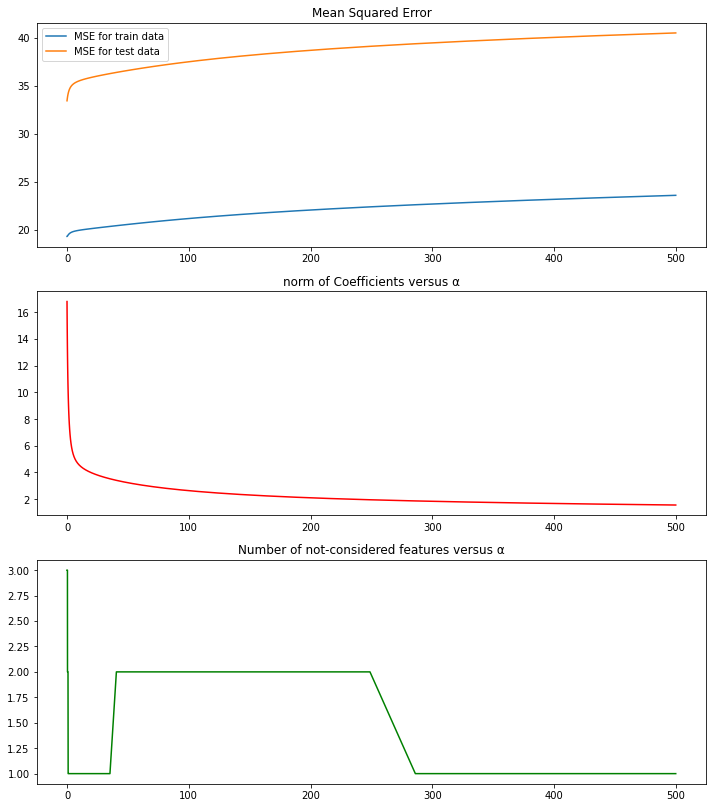

In [214]:
## Write your code here ##

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Ridge model for different alphas
MSE_train = np.zeros((len(alphas), 1))
MSE_test = np.zeros((len(alphas), 1))
norm_coeffs = []
not_considered_feature = np.zeros((len(alphas), 1))
threshold = 0.01
min_alpha_index = 0
best_coeff = []
best_bias = 0
tmp_2 = 0

index = 0
for alpha in alphas:
    clf = Ridge(alpha)
    clf.fit(X_train.copy(), y_train.copy())
    # Evaluate the model on both the train test set
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    MSE_train[index] = np.sum((y_train-y_train_pred)**2)/len(y_train)
    MSE_test[index] = np.sum((y_test-y_test_pred)**2)/len(y_test)
    
    tmp = clf.coef_
    norm_coeffs.append(np.linalg.norm(tmp))
    not_considered_feature[index] = len([x for x in tmp if abs(x) < threshold])
    
    tmp = tmp.reshape(13, 1)
    bias = clf.intercept_
    tmp_2 = X_test.reshape(len(y_test), 13)
    objective = np.sum((y_test.reshape(len(y_test), 1) - (tmp_2@tmp + bias))**2)/len(y_test)
    if (index == 0):
        min_objective = objective
        best_coeff = tmp
        best_bias = bias
    elif (objective < min_objective): 
        min_objective = objective
        min_alpha_index = index
        best_coeff = tmp
        best_bias = bias
        
    index = index + 1    

# plot the desired results    
plt.figure(figsize=(12,14))
plt.subplot(3, 1, 1)
plt.plot(alphas, MSE_train, label = 'MSE for train data')
plt.plot(alphas, MSE_test, label = 'MSE for test data')
plt.legend()
plt.title('Mean Squared Error')

plt.subplot(3, 1, 2)
plt.plot(alphas, norm_coeffs, color = 'red')
plt.title('norm of Coefficients versus α')

plt.subplot(3, 1, 3)
plt.plot(alphas, not_considered_feature, color = 'green')
plt.title('Number of not-considered features versus α')

plt.plot()

# optimal value for alpha and MSE, RMSE and Coefficients corresponding to it
tmp_2 = X_test.reshape(len(y_test), 13)
tmp = best_coeff
alpha = alphas[min_alpha_index]
MSE = np.sum((y_test.reshape(len(y_test),1) - (tmp_2@tmp + best_bias))**2)/len(y_test)
R_2 = r2_score(y_test, tmp_2@tmp + best_bias)
print('best α:')
print(alpha)
print('MSE:')
print(MSE)
print('R_2:')
print(R_2)
print("\nCoefficients:")
print(best_coeff)
print('best bias')
print(best_bias)
print('\ncomparison with linear regression:')
print('as we see, the best value of α for this problem is α = 0 because test size is 20% of all the data and train set is big enough. so the optimal coefficients'
      'and bias and also  the MSE and R_2 are the same as the linear regression case')

**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

best α:
0.0005
MSE:
33.46386715878282
R_2:
0.5890395598355426

Coefficients:
[[-1.19368366e-01]
 [ 4.48068763e-02]
 [ 4.77244973e-03]
 [ 2.33374037e+00]
 [-1.59416574e+01]
 [ 3.70915720e+00]
 [-3.27856146e-03]
 [-1.38366866e+00]
 [ 2.43648074e-01]
 [-1.10028246e-02]
 [-1.04408671e+00]
 [ 8.12071867e-03]
 [-4.92996926e-01]]
best bias
37.971375404848324

comparison with linear regression:
as we see, the best value of α for this problem is α = 0 because test size is 20% of all the data and train set is big enough. so the optimal coefficientsand bias and also  the MSE and R_2 are the same as the linear regression case


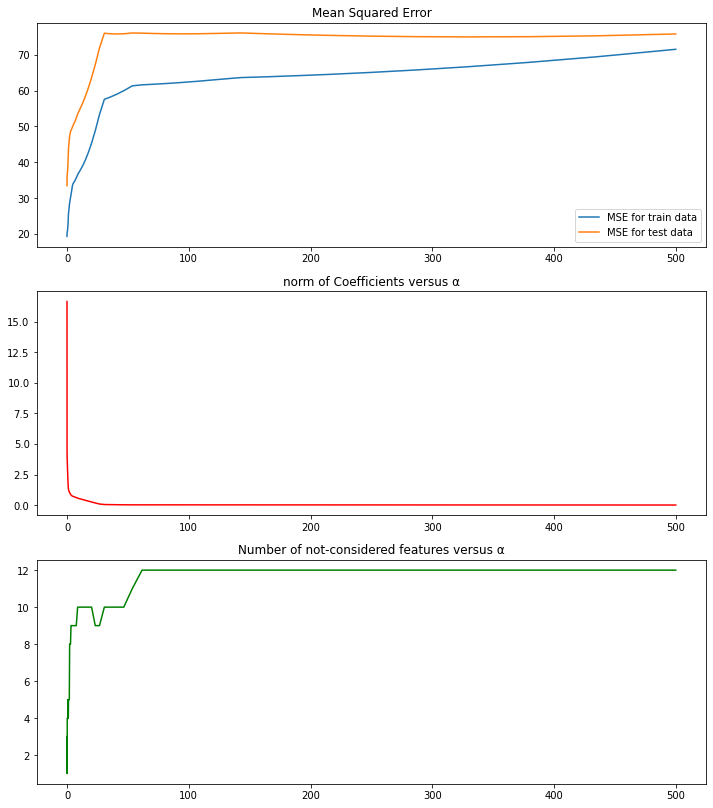

In [235]:
## Write your code here ##

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Lasso model for different alphas
MSE_train = np.zeros((len(alphas), 1))
MSE_test = np.zeros((len(alphas), 1))
norm_coeffs = []
not_considered_feature = np.zeros((len(alphas), 1))
threshold = 0.01
min_alpha_index = 0
best_coeff = []
best_bias = 0
tmp_2 = 0

index = 0
for alpha in alphas:
    clf = Lasso(alpha)
    clf.fit(X_train.copy(), y_train.copy())
    # Evaluate the model on both the train test set
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    MSE_train[index] = np.sum((y_train-y_train_pred)**2)/len(y_train)
    MSE_test[index] = np.sum((y_test-y_test_pred)**2)/len(y_test)
    
    tmp = clf.coef_
    norm_coeffs.append(np.linalg.norm(tmp))
    not_considered_feature[index] = len([x for x in tmp if abs(x) < threshold])
    
    tmp = tmp.reshape(13, 1)
    bias = clf.intercept_
    tmp_2 = X_test.reshape(len(y_test), 13)
    objective = np.sum((y_test.reshape(len(y_test), 1) - (tmp_2@tmp + bias))**2)/len(y_test)
    if (index == 0):
        min_objective = objective
        best_coeff = tmp
        best_bias = bias
    elif (objective < min_objective): 
        min_objective = objective
        min_alpha_index = index
        best_coeff = tmp
        best_bias = bias
        
    index = index + 1    

# plot the desired results    
plt.figure(figsize=(12,14))
plt.subplot(3, 1, 1)
plt.plot(alphas, MSE_train, label = 'MSE for train data')
plt.plot(alphas, MSE_test, label = 'MSE for test data')
plt.legend()
plt.title('Mean Squared Error')

plt.subplot(3, 1, 2)
plt.plot(alphas, norm_coeffs, color = 'red')
plt.title('norm of Coefficients versus α')

plt.subplot(3, 1, 3)
plt.plot(alphas, not_considered_feature, color = 'green')
plt.title('Number of not-considered features versus α')

plt.plot()

# optimal value for alpha and MSE, RMSE and Coefficients corresponding to it
tmp_2 = X_test.reshape(len(y_test), 13)
tmp = best_coeff
alpha = alphas[min_alpha_index]
MSE = np.sum((y_test.reshape(len(y_test),1) - (tmp_2@tmp + best_bias))**2)/len(y_test)
R_2 = r2_score(y_test, tmp_2@tmp + best_bias)
print('best α:')
print(alpha)
print('MSE:')
print(MSE)
print('R_2:')
print(R_2)
print("\nCoefficients:")
print(best_coeff)
print('best bias')
print(best_bias)
print('\ncomparison with linear regression:')
print('as we see, the best value of α for this problem is α = 0 because test size is 20% of all the data and train set is big enough. so the optimal coefficients'
      'and bias and also  the MSE and R_2 are the same as the linear regression case')

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

In [252]:
## Write you code here ## 

train_ratio = np.linspace(0.1, 0.9, 100)

linear_R2 = np.zeros((len(train_ratio), 1))
ridge_R2 = np.zeros((len(train_ratio), 1))
lasso_R2 = np.zeros((len(train_ratio), 1))

alpha_ridge = np.zeros((len(train_ratio), 1))
alpha_lasso = np.zeros((len(train_ratio), 1))

min_alpha_index_ridge = 0
min_alpha_index_lasso = 0
tmp_ridge = 0
tmp_lasso = 0
index_outer = 0

for ratio in train_ratio:
    # split with the current ratio
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = ratio, random_state = 0)
    index_inner = 0
    for alpha in alphas:    
        # defining the alpha dependent models and train them
        ridge = Ridge(alpha)
        ridge.fit(X_train, y_train)
        lasso = Lasso(alpha)
        lasso.fit(X_train, y_train)
        
        # predict the test data
        y_ridge_pred = ridge.predict(X_test)
        y_lasso_pred = lasso.predict(X_test)
        
        # updating alpha is required
        mse_ridge = np.sum((y_test.reshape(len(y_test), 1) - y_ridge_pred.reshape(len(y_test), 1))**2)/len(y_test)
        mse_lasso = np.sum((y_test.reshape(len(y_test), 1) - y_lasso_pred.reshape(len(y_test), 1))**2)/len(y_test)
        if (index_inner == 0):
            tmp_ridge = mse_ridge
            tmp_lasso = mse_lasso
            min_alpha_index_ridge = 0
            min_alpha_index_lasso = 0
        else:
            if (mse_ridge < tmp_ridge):
                tmp_ridge = mse_ridge
                min_alpha_index_ridge = index_inner
            if (mse_lasso < tmp_lasso):
                tmp_lasso = mse_lasso
                min_alpha_index_lasso = index_inner    
        
        # next iteration        
        index_inner = index_inner + 1   
        
    # defining and training the models with specified alpha and also the linear model
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    ridge = Ridge(alphas[min_alpha_index_ridge])
    ridge.fit(X_train, y_train)
    lasso = Lasso(alphas[min_alpha_index_lasso])
    lasso.fit(X_train, y_train)
    
    # predict the test data
    y_linear_pred = regressor.predict(X_test)
    y_ridge_pred = ridge.predict(X_test)
    y_lasso_pred = lasso.predict(X_test)
    
    # compute R_2 for each model
    linear_R2[index_outer] = r2_score(y_test, y_linear_pred)
    ridge_R2[index_outer] = r2_score(y_test, y_ridge_pred)
    lasso_R2[index_outer] = r2_score(y_test, y_lasso_pred) 
    
    # saving the optimal alpha
    alpha_ridge[index_outer] = alphas[min_alpha_index_ridge]
    alpha_lasso[index_outer] = alphas[min_alpha_index_lasso]
    
    # next iteration
    index_outer = index_outer + 1

[]

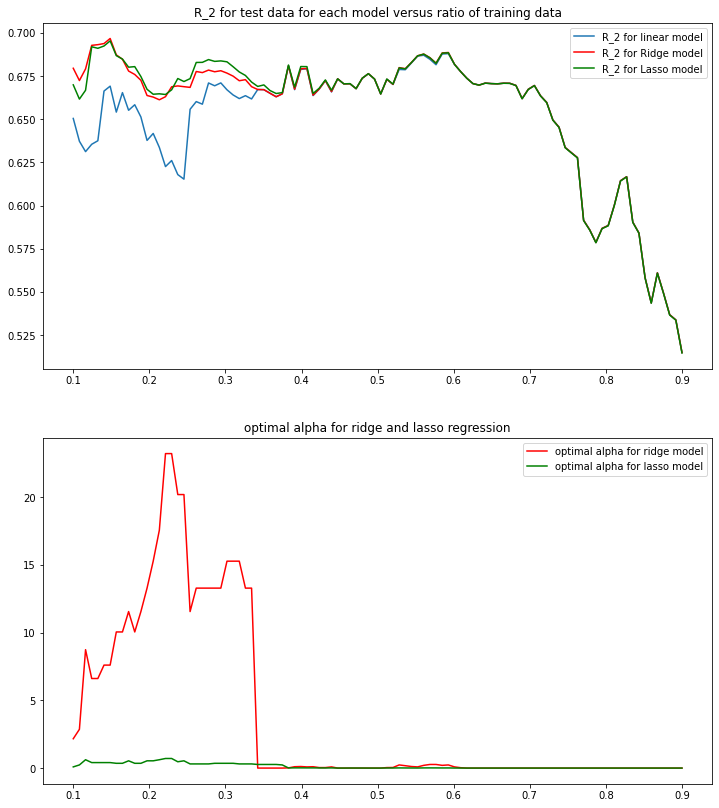

In [256]:
# plot the desired results    
plt.figure(figsize=(12,14))
plt.subplot(2, 1, 1)
plt.plot(train_ratio, linear_R2, label = 'R_2 for linear model')
plt.plot(train_ratio, ridge_R2, color = 'red', label = 'R_2 for Ridge model')
plt.plot(train_ratio, lasso_R2, color = 'green', label = 'R_2 for Lasso model')
plt.legend()
plt.title('R_2 for test data for each model versus ratio of training data')

plt.subplot(2, 1, 2)
plt.plot(train_ratio, alpha_ridge, color = 'red', label = 'optimal alpha for ridge model')
plt.plot(train_ratio, alpha_lasso, color = 'green', label = 'optimal alpha for lasso model')
plt.legend()
plt.title('optimal alpha for ridge and lasso regression')

plt.plot()

In [249]:
# by observing these plots, it is concluded that for small train size the MAP models(lasso and ridge)
# have better performance and ...

array([0.5885294])